# IPL Analytics

In [ ]:
#Insights:-

# How often Winning toss team win the match.
# No of toss winned by ipl teams.
# No of match won by individual teams per season.
# How many teams choose to bat first after winning the toss.
# First batting team winning chances vs First field team winning.
# No of matches happened in different statiums.
# Score of teams having batting first vs Score of teams having fielding first.
# How many time cricketer is awarded with man of the match.
# No of matches played by each team.
# No of matches played in each IPL season.
# No of matches won by each across all IPL seasons.
# Winning ration of each team (No of matches playes vs no of matches won).
# No of matches by teams per season.
# No of matches hosted by stadiums
# No of teams participated in ipl across seasons
# No of matches won by teams.



# Pending Insights:-

# Do the team that play the first match - ever win the tournament? Do they make to the next round?
# How often each of the IPL teams win its first game of the season?

In [198]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
#loading csv in pandas
df = pd.read_csv(r"C:\Users\chhok\Downloads\match_data.csv")

In [200]:
#checking dataframe
df.head()

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,392217,2009,Kimberley,39942,S Badrinath,De Beers Diamond Oval,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,bat,Chennai Super Kings,wickets,7.0,N,NaN,GAV Baxter,HDPK Dharmasena
1,1254112,2021,Sharjah,44471,AR Patel,Sharjah Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,4.0,N,NaN,AK Chaudhary,MA Gough
2,829817,2015,Mumbai,42143,KA Pollard,Wankhede Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,25.0,N,NaN,HDPK Dharmasena,RK Illingworth
3,336022,2007/08,Delhi,39585,DPMD Jayawardene,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,NaN,AV Jayaprakash,RE Koertzen
4,501258,2011,Indore,40678,BJ Hodge,Holkar Cricket Stadium,Kochi Tuskers Kerala,Rajasthan Royals,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,8.0,N,NaN,PR Reiffel,RJ Tucker


In [201]:
#statical overview
df.describe()

,id,date,result_margin,method
count,8.760000e+02,876.000000,857.000000,0.0
mean,7.904412e+05,41924.200913,17.075846,NaN
std,3.209042e+05,1472.573208,21.816141,NaN
min,3.359820e+05,39556.000000,1.000000,NaN
25%,5.012428e+05,40668.000000,6.000000,NaN
50%,7.340100e+05,41773.500000,8.000000,NaN
75%,1.136581e+06,43212.250000,19.000000,NaN
max,1.254117e+06,44484.000000,146.000000,NaN


In [202]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               876 non-null    int64  
 1   season           876 non-null    object 
 2   city             825 non-null    object 
 3   date             876 non-null    int64  
 4   player_of_match  872 non-null    object 
 5   venue            876 non-null    object 
 6   team1            876 non-null    object 
 7   team2            876 non-null    object 
 8   toss_winner      876 non-null    object 
 9   toss_decision    875 non-null    object 
 10  winner           871 non-null    object 
 11  result           871 non-null    object 
 12  result_margin    857 non-null    float64
 13  eliminator       875 non-null    object 
 14  method           0 non-null      float64
 15  umpire1          875 non-null    object 
 16  umpire2          875 non-null    object 
dtypes: float64(2), i

In [203]:
#checking null values
df.isnull().sum()

id                   0
season               0
city                51
date                 0
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        1
winner               5
result               5
result_margin       19
eliminator           1
method             876
umpire1              1
umpire2              1
dtype: int64

In [205]:
#Question - Winning toss - how often they win the match?

In [206]:
#Affect of toss wining on actual winning
df["Wiining_match"]=np.where((df["toss_winner"]== df["winner"]),1,0)

In [207]:
df["Wiining_match"].mean()*100

51.71232876712328

In [208]:
#better way
for ind in df.index:
    if df['toss_winner'][ind] == df['winner'][ind]:
        won+=1
    else:
        lost+=1  

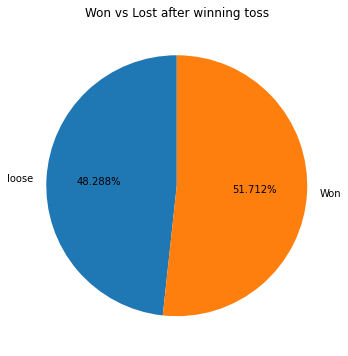

In [209]:
plt.figure(figsize=(8,6))
plt.title("Won vs Lost after winning toss")
plt.pie((lost,won), labels=("loose","Won"), autopct='%1.3f%%', startangle=90);

In [210]:
#obervation = no major difference between toss wining and actual winning

In [211]:
#most toss winned by team
df['toss_winner'].value_counts() 

Mumbai Indians                 114
Kolkata Knight Riders          106
Chennai Super Kings            103
Royal Challengers Bangalore     97
Rajasthan Royals                95
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             64
Deccan Chargers                 43
Delhi Capitals                  28
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Punjab Kings                     5
Name: toss_winner, dtype: int64

In [212]:
#no of Matches won by team
df.groupby('season')['winner'].value_counts()

season   winner                     
2007/08  Rajasthan Royals               13
         Kings XI Punjab                10
         Chennai Super Kings             9
         Delhi Daredevils                7
         Mumbai Indians                  7
                                        ..
2021     Royal Challengers Bangalore     9
         Mumbai Indians                  7
         Punjab Kings                    6
         Rajasthan Royals                5
         Sunrisers Hyderabad             3
Name: winner, Length: 116, dtype: int64

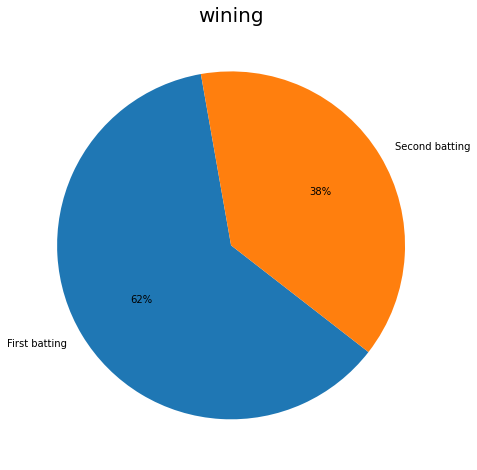

In [213]:
# after toss wining team desision
str = df["toss_decision"].value_counts()
lbr = ["First batting", "Second batting"]
plt.figure(figsize=(8,8))
plt.pie(str, labels = lbr, startangle = 100, autopct='%1.0f%%')
plt.title("wining", fontdict={'fontsize':20}) 
plt.show()

In [ ]:
#observation - After toss wining more teams choose to bat first

In [214]:
#loading second csv
df_all_matches = pd.read_csv(r"C:\Users\chhok\Downloads\ipl_csv2\all_matches.csv")

C:\Users\chhok\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [215]:
#checking its dtypes
df_all_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  float64
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [216]:
#Checking the dataframe
df_all_matches

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.2,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.3,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,Shivam Mavi,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.4,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.5,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,caught,Shivam Mavi,NaN,NaN


In [217]:
#Question -3- Do first batting win or second

In [218]:
#creating variable for second batting
batting_sec=df[df['toss_decision'] == "field"]

In [219]:
batting_sec['winner'].value_counts()

Mumbai Indians                 75
Kolkata Knight Riders          67
Royal Challengers Bangalore    67
Kings XI Punjab                64
Chennai Super Kings            58
Rajasthan Royals               49
Sunrisers Hyderabad            44
Delhi Daredevils               38
Delhi Capitals                 21
Deccan Chargers                15
Gujarat Lions                  11
Rising Pune Supergiant         10
Punjab Kings                    6
Kochi Tuskers Kerala            6
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [220]:
ty = batting_sec['winner'].value_counts().sum()

In [221]:
ty

537

In [222]:
ty/871*100

61.653272101033295

In [223]:
#537 times second batting team wins the game out of total 871 matches which has 61.65% wining probability

In [224]:
batting_fir=df[df['toss_decision'] == "bat"]

In [225]:
batting_fir['winner'].value_counts()

Chennai Super Kings            59
Mumbai Indians                 52
Kolkata Knight Riders          41
Rajasthan Royals               37
Royal Challengers Bangalore    33
Delhi Daredevils               29
Kings XI Punjab                24
Sunrisers Hyderabad            24
Deccan Chargers                14
Pune Warriors                   9
Delhi Capitals                  8
Gujarat Lions                   2
Rising Pune Supergiants         2
Name: winner, dtype: int64

In [226]:
yt = batting_fir['winner'].value_counts().sum()

In [227]:
yt

334

In [228]:
yt/871*100

38.346727898966705

In [229]:
#334 times second batting team wins the game out of total 871 matches which has only 38.34% wining probability

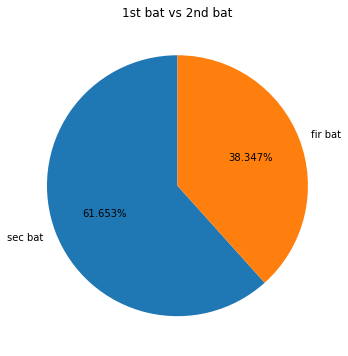

In [230]:
plt.figure(figsize=(8,6))
plt.title("1st bat vs 2nd bat")
plt.pie((ty,yt), labels=("sec bat","fir bat"), autopct='%1.3f%%', startangle=90);

In [231]:
#Observation  - so bat first has more prob of loosing instead of winning the match.

In [232]:
#Some interesting insights for the opening match

In [233]:
#no of matches in following stadiums
df['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              16
Rajiv Gandhi International Stadium                      15
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

In [234]:
#most toss winner nd actual winner teams
df.groupby('winner')['toss_winner'].value_counts()

winner               toss_winner          
Chennai Super Kings  Chennai Super Kings      67
                     Rajasthan Royals         11
                     Kolkata Knight Riders     9
                     Delhi Daredevils          5
                     Mumbai Indians            5
                                              ..
Sunrisers Hyderabad  Delhi Daredevils          3
                     Chennai Super Kings       2
                     Delhi Capitals            2
                     Pune Warriors             2
                     Punjab Kings              1
Name: toss_winner, Length: 134, dtype: int64

In [ ]:
#Question -1- Avg score first batting, Avg score second batting.


#Answer
#avg score of 1st innings = sum of all 1st innings score/no of match
#avg score of 2nd innings = sum of all 2nd innings score/no of match
#score = wides+ runn_off_bats (which data is given under individual csv,,need to combine for all)

In [287]:
#loading 3rd csv for total runs scored by team

In [240]:
df_combined = pd.read_csv(r"C:\Users\chhok\Downloads\merged_corr.csv")

C:\Users\chhok\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [241]:
df_combined

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208037,1254117,2021,15-10-2021,Dubai International Cricket Stadium,2,19.2,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,15-10-2021,Dubai International Cricket Stadium,2,19.3,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,Shivam Mavi,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,15-10-2021,Dubai International Cricket Stadium,2,19.4,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,15-10-2021,Dubai International Cricket Stadium,2,19.5,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,caught,Shivam Mavi,NaN,NaN


In [251]:
#checking the dtypes
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  float64
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [422]:
df_combined["total_run"]=df_combined["runs_off_bat"] + df_combined["extras"]

In [425]:
df_combined[0:9]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_run
0,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
1,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
7,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,1.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,1.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [424]:
total_score = df_combined.groupby(['match_id','innings']).sum()['total_run'].reset_index()
total_score

,match_id,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1775,1254115,2,139
1776,1254116,1,135
1777,1254116,2,136
1778,1254117,1,192


In [388]:
total_scor = df_combined.groupby(['innings']).sum()['total_run'].reset_index()
total_scor[0:2]

,innings,total_run
0,1,141628
1,2,129788


In [ ]:
#Observation - Total run scored by teams are highes in innings 1 compare to innings 2

In [304]:
#Some interesting insights for the opening match

In [305]:
#Most man of the match award
print(df['player_of_match'].value_counts())

AB de Villiers    25
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
PK Garg            1
MS Gony            1
KMA Paul           1
SM Katich          1
SP Goswami         1
Name: player_of_match, Length: 242, dtype: int64


<AxesSubplot:>

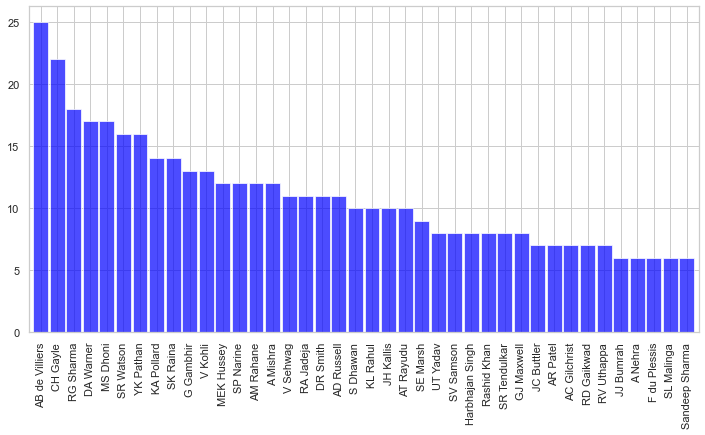

In [404]:
plt.subplots(figsize=(12,6))
x=df['player_of_match'].value_counts()
y=x.head(40)
y.plot.bar(width=0.9,color="blue",alpha=0.7)

In [309]:
team_all=(df['team1'].value_counts() + df['team2'].value_counts()).reset_index()

In [311]:
team_all.columns=['team_name','Matches_played']
team_all

,team_name,Matches_played
0,Chennai Super Kings,194
1,Deccan Chargers,75
2,Delhi Capitals,49
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,209
8,Mumbai Indians,217
9,Pune Warriors,46


In [312]:
#question - 4 - Do the team that play the first match - ever win the tournament? Do they make to the next round?

#problem - IPL is itself a tournament, which other tournament is asked by the question? 



In [313]:
#todays Questions
#How often each of the IPL teams win game 1 for eg: CSK: how many times have the won game 1? 
#for each of 8 teams do it (2 new teams..so,ignore them)

#Answer - 

In [317]:
#total no of teams playing
df["team1"].unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Delhi Capitals', 'Kings XI Punjab',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiant',
       'Punjab Kings', 'Rising Pune Supergiants'], dtype=object)

In [322]:
#no of matches played in each season
df['season'].value_counts()

2013       76
2012       74
2011       73
2021       60
2014       60
2016       60
2009/10    60
2018       60
2020/21    60
2019       60
2017       59
2015       59
2007/08    58
2009       57
Name: season, dtype: int64

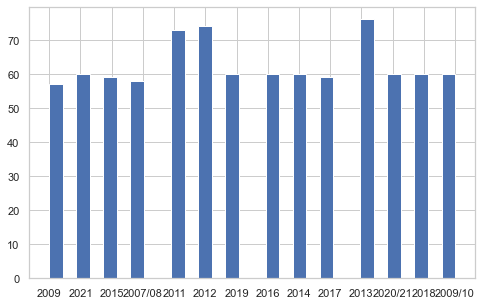

In [410]:
#visulization of no of match played in each season
plt.figure(figsize=(8,5))
plt.hist(df['season'], bins=30)
plt.show()

In [335]:
#no of matches played by each team
match_team=(df['team1'].value_counts()+df['team2'].value_counts()).reset_index()


In [336]:
match_team.columns=['team_name','Matches_played']

In [349]:
match_team[0:7]

,team_name,Matches_played
0,Chennai Super Kings,194
1,Deccan Chargers,75
2,Delhi Capitals,49
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14


In [338]:
import seaborn as sns

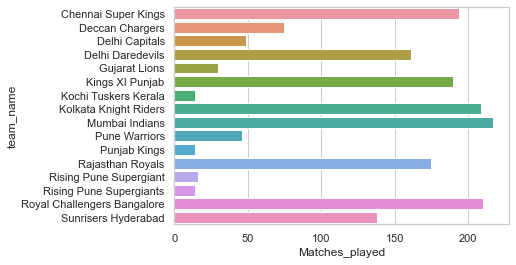

In [347]:
ax = sns.barplot(x="Matches_played", y="team_name", data=match_team)

In [ ]:
# No of matches played by each IPL tem across all season

In [353]:
#no of wins per match across all season
wins=pd.DataFrame(df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,Mumbai Indians,127
1,Chennai Super Kings,117
2,Kolkata Knight Riders,108
3,Royal Challengers Bangalore,100
4,Kings XI Punjab,88
5,Rajasthan Royals,86
6,Sunrisers Hyderabad,68
7,Delhi Daredevils,67
8,Deccan Chargers,29
9,Delhi Capitals,29


In [355]:
#merge wins, match played
player=match_team.merge(wins,left_on='team_name',right_on='team_name',how='inner')

In [356]:
player.columns=['team','matches_played','wins']
player

,team,matches_played,wins
0,Chennai Super Kings,194,117
1,Deccan Chargers,75,29
2,Delhi Capitals,49,29
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,209,108
8,Mumbai Indians,217,127
9,Pune Warriors,46,12


Text(0, 0.5, 'No.of wins ')

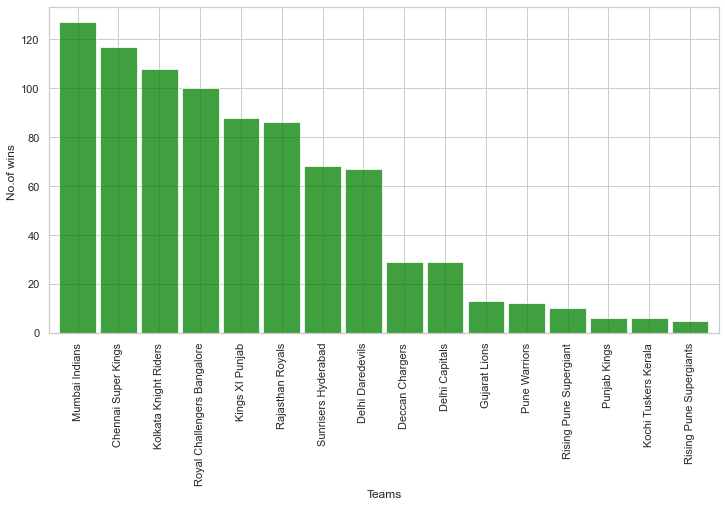

In [396]:
plt.subplots(figsize=(12,6))
df['winner'].value_counts().plot.bar(width=0.9,color="Green",alpha=0.75)
plt.xlabel("Teams")
plt.ylabel("No.of wins ")

In [378]:
#no of match played vs no of wins vs wining ratio
player['%win']=(player['wins']/player['matches_played'])*100
player

,team,matches_played,wins,%win
0,Chennai Super Kings,194,117,60.309278
1,Deccan Chargers,75,29,38.666667
2,Delhi Capitals,49,29,59.183673
3,Delhi Daredevils,161,67,41.614907
4,Gujarat Lions,30,13,43.333333
5,Kings XI Punjab,190,88,46.315789
6,Kochi Tuskers Kerala,14,6,42.857143
7,Kolkata Knight Riders,209,108,51.674641
8,Mumbai Indians,217,127,58.525346
9,Pune Warriors,46,12,26.086957


In [379]:
#Ipl teams won no of match in each season
df.groupby('season')['winner'].value_counts()[0:60]

season   winner                     
2007/08  Rajasthan Royals               13
         Kings XI Punjab                10
         Chennai Super Kings             9
         Delhi Daredevils                7
         Mumbai Indians                  7
         Kolkata Knight Riders           6
         Royal Challengers Bangalore     4
         Deccan Chargers                 2
2009     Delhi Daredevils               10
         Deccan Chargers                 9
         Royal Challengers Bangalore     9
         Chennai Super Kings             8
         Kings XI Punjab                 7
         Rajasthan Royals                6
         Mumbai Indians                  5
         Kolkata Knight Riders           3
2009/10  Mumbai Indians                 11
         Chennai Super Kings             9
         Deccan Chargers                 8
         Royal Challengers Bangalore     8
         Delhi Daredevils                7
         Kolkata Knight Riders           7
         Rajastha

In [382]:

#Question - How often each of the IPL teams win its first game of the season.


In [ ]:
#Answer - First sort all matches data according to date in asscending order then create a lop where first see winner column and 
#try to find the value of this from the column of team1 and team 2 above the row. if we found a value matching with winner 
#then reject the value else select that and do it for all season.

<AxesSubplot:>

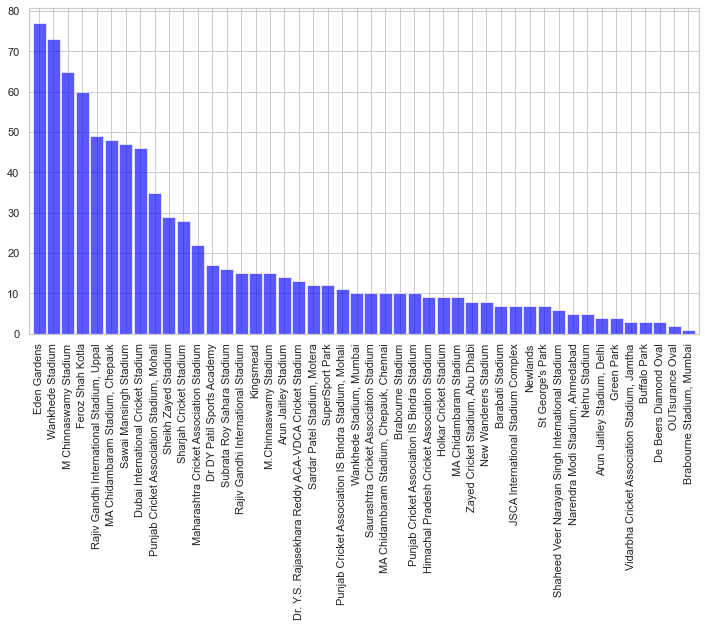

In [452]:
# No of matches hosted by stadiums
plt.subplots(figsize=(12,6))
df['venue'].value_counts().plot.bar(width=0.9,color="blue",alpha=0.65)

In [ ]:
#observation - Most of the matches are held in eden gardgen followed by wankhede stadium and so on.

Text(0.5, 0, 'Season')

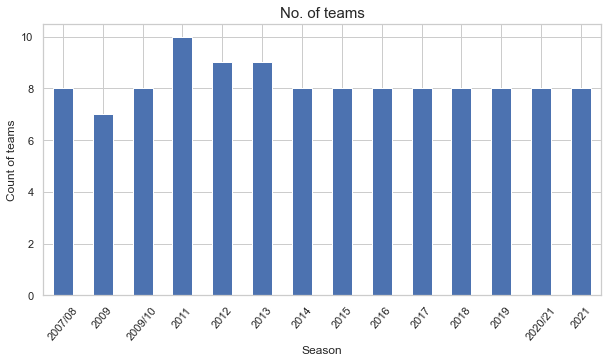

In [449]:
# No of teams participated in ipl across seasons
df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(10,5))
plt.title("No. of teams",fontsize=15)
plt.xticks(rotation=50)
plt.ylabel("Count of teams")
plt.xlabel("Season")

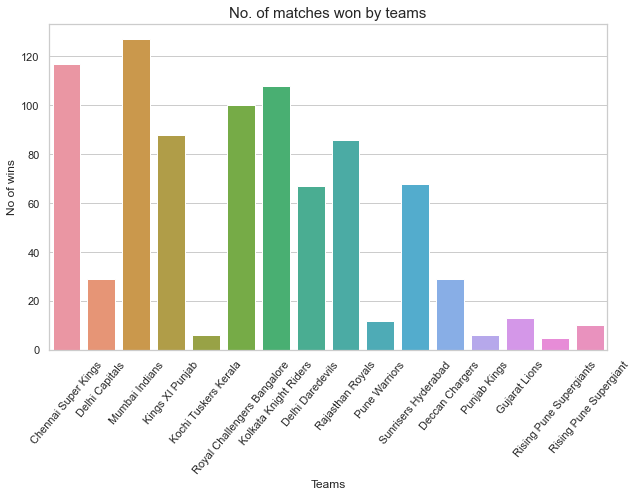

In [454]:
# No of matches won by teams.
plt.figure(figsize = (10,6))
sns.countplot(x='winner',data=df)
plt.title("No. of matches won by teams",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Teams")
plt.ylabel("No of wins")
plt.show()